In [135]:
import pandas as pd

data = pd.read_csv('data.csv')

data = data.rename(index=str, columns={"Highest completed level of education": "Education", 
                                "Do you have a significant other?": "HasPartner",
                                "Which one do you prefer most?": "SexPreference",
                                "How many sexual partners have you had in the past year ": "SexPartners",
                                "Would you consider yourself sexually adventurous?": "IsAdv",
                                "What type of snacks do you prefer?": "SnackPreference"})

data = data[data["Age"] < 100]
data = data[data["Age"] >= 10]

data = data[data["SexPartners"] < 30]

data.replace({'Savoury Snacks (Crisps, Hummus, etc)' : 1,
             'Sweet Snacks (Cookies, Candy, etc)': 0,
             'Yes': 1, 'No': 0, 'Maybe': 0.5,
             'No education': 0, 'High school': 1, 'Bachelor': 2, 'Masters' : 3,
             'PhD': 4, 'Cuddling': 0, 'Sex': 1}, value=None, inplace=True)

data.dropna(inplace=True)


y = data[['SnackPreference']].values

y = y.reshape((len(y),))

X = data.drop("SnackPreference", axis = 1)


X.head()

,Timestamp,Sex,Age,Education,HasPartner,SexPreference,SexPartners,IsAdv
0,2018/11/14 3:10:19 PM GMT+1,Male,24.0,2.0,0.0,0,1,1.0
1,2018/11/14 3:22:12 PM GMT+1,Male,38.0,4.0,1.0,1,1,1.0
2,2018/11/14 3:23:21 PM GMT+1,Female,22.0,2.0,1.0,1,1,1.0
3,2018/11/14 3:23:49 PM GMT+1,Female,20.0,1.0,0.0,0,1,0.0
4,2018/11/14 3:24:01 PM GMT+1,Male,17.0,1.0,0.0,0,0,0.0


In [136]:
X.describe()

,Age,Education,HasPartner,SexPreference,SexPartners,IsAdv
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000
mean,25.343959,1.694087,0.567609,0.403599,1.305913,0.516452
std,7.099922,0.803472,0.484778,0.490745,1.976324,0.411057
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,1.000000,0.000000,1.000000,0.500000
75%,29.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,63.000000,4.000000,1.000000,1.000000,25.000000,1.000000


Note that on this plot cuddling is purple


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026766AD9C50>,
      dtype=object)

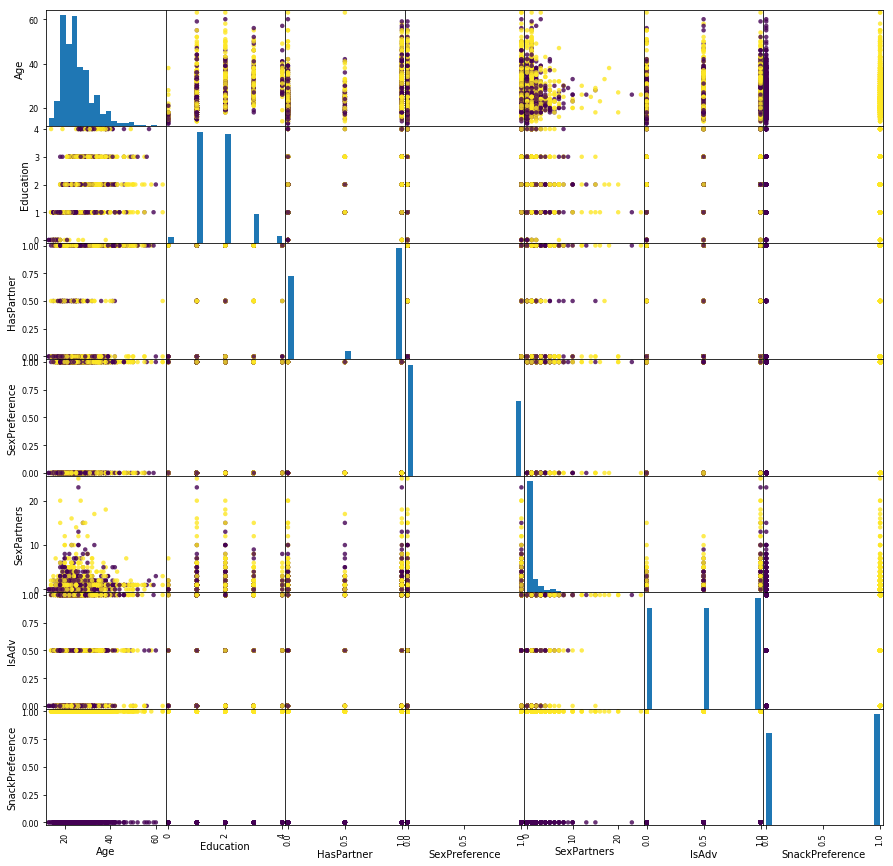

In [137]:
print("Note that on this plot cuddling is purple")

pd.scatter_matrix(data, c=y, figsize=(15,15), 
                  marker='o', hist_kwds={'bins': 20}, s=20, 
                  alpha=.8, cmap='viridis')

In [138]:
sweet_cuddling = data[(data["SexPreference"] == 0) & (data["SnackPreference"] == 0)]
sweet_sex = data[(data["SexPreference"] == 1) & (data["SnackPreference"] == 0)]
savory_cuddling = data[(data["SexPreference"] == 0) & (data["SnackPreference"] == 1)]
savory_sex = data[(data["SexPreference"] == 1) & (data["SnackPreference"] == 1)]

print(len(sweet_cuddling))
print(len(sweet_sex))
print(len(savory_cuddling))
print(len(savory_sex))

541
341
619
444


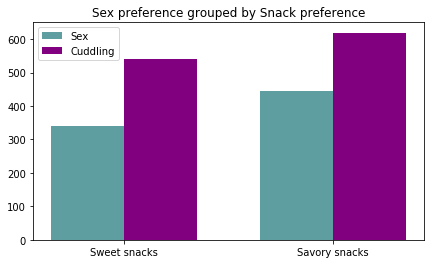

In [139]:
import numpy as np
import matplotlib.pyplot as plt


N = 2

fig, ax = plt.subplots(figsize=(7,4))

ind = np.arange(2)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, [len(sweet_sex), len(savory_sex)], width, color='cadetblue', bottom=0)


p2 = ax.bar(ind + width, [len(sweet_cuddling), len(savory_cuddling)], width,
            color='purple', bottom=0)

ax.set_title('Sex preference grouped by Snack preference')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Sweet snacks', 'Savory snacks'])

plt.legend((p1[0], p2[0]), ('Sex', 'Cuddling'), loc="upper left")


fig.savefig("docs/plots/gbar-snacks-sex.png", bbox_inches = 'tight')

plt.show()

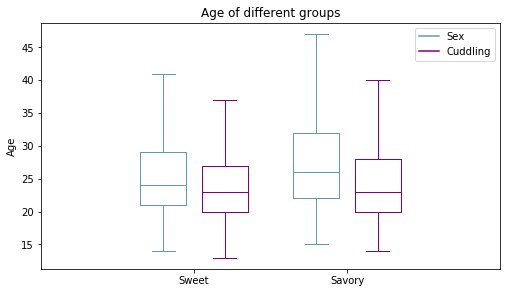

In [140]:
cuddling = [sweet_cuddling["Age"].values, savory_cuddling["Age"].values]
sex = [sweet_sex["Age"].values, savory_sex["Age"].values]

ticks = ['Sweet', 'Savory']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(7,4))

bpl = plt.boxplot(sex, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(cuddling, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, 'cadetblue') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'purple')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='cadetblue', label='Sex')
plt.plot([], c='purple', label='Cuddling')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.tight_layout()

plt.title("Age of different groups")
plt.ylabel("Age")

plt.show()
fig.savefig("docs/plots/boxplot-sex-snack-ages.png", bbox_inches = 'tight')

In [141]:
from scipy import stats

stats.wilcoxon(data["SexPreference"], data["SnackPreference"])

WilcoxonResult(statistic=163850.5, pvalue=2.900925690838174e-19)

In [142]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('SexPreference ~ Age + Education + HasPartner + SexPartners + IsAdv + SnackPreference', data=data).fit()

# Inspect the result
print(results.summary())

print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:          SexPreference   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     30.14
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.01e-34
Time:                        17:11:43   Log-Likelihood:                -1288.1
No. Observations:                1945   AIC:                             2590.
Df Residuals:                    1938   BIC:                             2629.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0030      0.042     

# Data reconnaissance

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


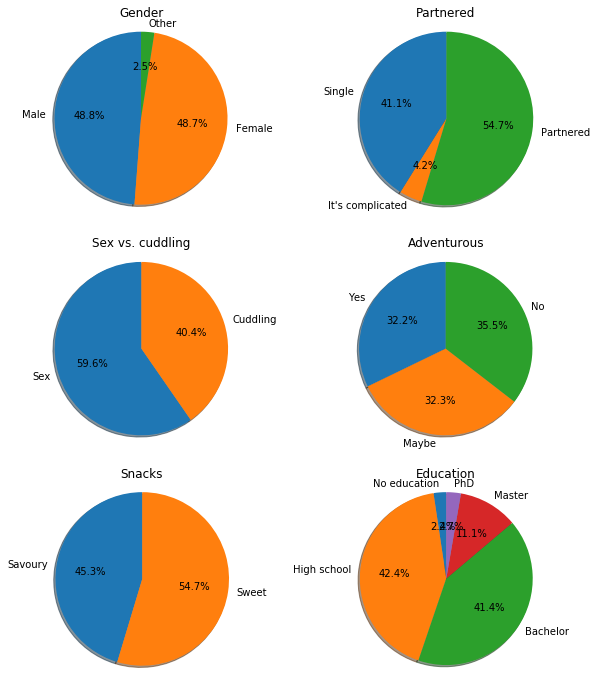

In [143]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female', 'Other'
sizes = [len(data[data['Sex'] == 'Male']), len(data[data['Sex'] == 'Female']), len(data[(data['Sex'] != 'Male') & (data['Sex'] != 'Female')])]

fig = plt.figure(figsize=(10,12))

ax1 = fig.add_subplot(321)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.title.set_text("Gender")


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Single', 'It\'s complicated', 'Partnered'
sizes = [len(data[data['HasPartner'] == 0]), len(data[data['HasPartner'] == 0.5]), len(data[(data['HasPartner'] == 1)])]

ax2 = fig.add_subplot(322)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.title.set_text("Partnered")

labels = 'Sex', 'Cuddling'
sizes = [len(data[data['SexPreference'] == 0]), len(data[data['SexPreference'] == 1])]

ax3 = fig.add_subplot(323)
ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax3.title.set_text("Sex vs. cuddling")

labels = 'Yes', 'Maybe', 'No'
sizes = [len(data[data['IsAdv'] == 0]), len(data[data['IsAdv'] == 0.5]), len(data[data['IsAdv'] == 1])]

ax4 = fig.add_subplot(324)
ax4.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax4.title.set_text("Adventurous")

labels = 'Savoury', 'Sweet'
sizes = [len(data[data['SnackPreference'] == 0]), len(data[data['SnackPreference'] == 1])]

ax5 = fig.add_subplot(325)
ax5.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax5.title.set_text("Snacks")

labels = 'No education', 'High school', 'Bachelor', 'Master', 'PhD'
sizes = [len(data[data['Education'] == 0]), len(data[data['Education'] == 1]) , len(data[data['Education'] == 2]), len(data[data['Education'] == 3]), len(data[data['Education'] == 4])]

ax6 = fig.add_subplot(326)
ax6.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax6.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax6.title.set_text("Education")

#plt.tight_layout()


fig.show()
fig.savefig("docs/plots/pies.png", bbox_inches = 'tight')

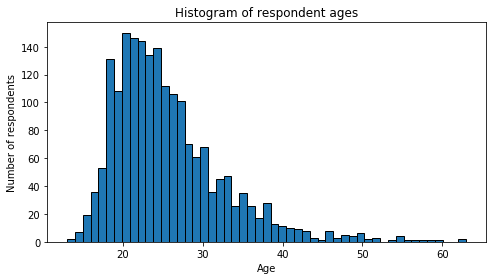

In [160]:
fig = plt.figure(figsize=(7,4))

plt.hist(data["Age"].values, 51, edgecolor='black')
plt.ylabel('Number of respondents')
plt.xlabel('Age')
plt.title('Histogram of respondent ages')

# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()
plt.show()
fig.savefig("docs/plots/hist-ages.png", bbox_inches = 'tight')

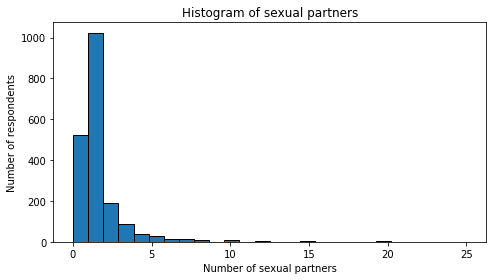

In [145]:
fig = plt.figure(figsize=(7,4))

plt.hist(data["SexPartners"].values, 26, edgecolor='black')
plt.ylabel('Number of respondents')
plt.xlabel('Number of sexual partners')
plt.title('Histogram of sexual partners')

# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()
plt.show()

fig.savefig("docs/plots/hist-partners.png", bbox_inches = 'tight')

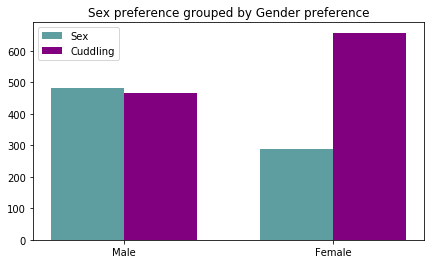

In [146]:
male_cuddling = data[(data["SexPreference"] == 0) & (data["Sex"] == 'Male')]
male_sex = data[(data["SexPreference"] == 1) & (data["Sex"] == 'Male')]
female_cuddling = data[(data["SexPreference"] == 0) & (data["Sex"] == 'Female')]
female_sex = data[(data["SexPreference"] == 1) & (data["Sex"] == 'Female')]

import numpy as np
import matplotlib.pyplot as plt


N = 2

fig, ax = plt.subplots(figsize=(7,4))

ind = np.arange(2)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, [len(male_sex), len(female_sex)], width, color='cadetblue', bottom=0)


p2 = ax.bar(ind + width, [len(male_cuddling), len(female_cuddling)], width,
            color='purple', bottom=0)

ax.set_title('Sex preference grouped by Gender preference')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Male', 'Female'])

plt.legend((p1[0], p2[0]), ('Sex', 'Cuddling'), loc="upper left")

plt.show()
fig.savefig("docs/plots/gbar-gender-sex.png", bbox_inches = 'tight')

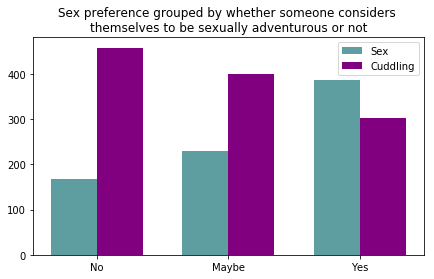

In [147]:
regular_cuddling = data[(data["SexPreference"] == 0) & (data["IsAdv"] == 0)]
regular_sex = data[(data["SexPreference"] == 1) & (data["IsAdv"] == 0)]
mixed_cuddling = data[(data["SexPreference"] == 0) & (data["IsAdv"] == 0.5)]
mixed_sex = data[(data["SexPreference"] == 1) & (data["IsAdv"] == 0.5)]
adv_cuddling = data[(data["SexPreference"] == 0) & (data["IsAdv"] == 1)]
adv_sex = data[(data["SexPreference"] == 1) & (data["IsAdv"] == 1)]

import numpy as np
import matplotlib.pyplot as plt


N = 3

fig, ax = plt.subplots(figsize=(7,4))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, [len(regular_sex), len(mixed_sex), len(adv_sex)], width, color='cadetblue', bottom=0)


p2 = ax.bar(ind + width, [len(regular_cuddling), len(mixed_cuddling), len(adv_cuddling)], width,
            color='purple', bottom=0)

ax.set_title('Sex preference grouped by whether someone considers \nthemselves to be sexually adventurous or not')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['No', 'Maybe', 'Yes'])

plt.legend((p1[0], p2[0]), ('Sex', 'Cuddling'), loc="upper right")

plt.show()
fig.savefig("docs/plots/gbar-adv-sex.png", bbox_inches = 'tight')

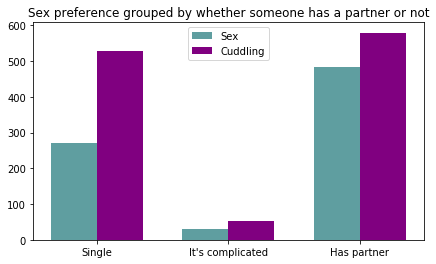

In [148]:
single_cuddling = data[(data["SexPreference"] == 0) & (data["HasPartner"] == 0)]
single_sex = data[(data["SexPreference"] == 1) & (data["HasPartner"] == 0)]
maybe_cuddling = data[(data["SexPreference"] == 0) & (data["HasPartner"] == 0.5)]
maybe_sex = data[(data["SexPreference"] == 1) & (data["HasPartner"] == 0.5)]
partner_cuddling = data[(data["SexPreference"] == 0) & (data["HasPartner"] == 1)]
partner_sex = data[(data["SexPreference"] == 1) & (data["HasPartner"] == 1)]

import numpy as np
import matplotlib.pyplot as plt


N = 3

fig, ax = plt.subplots(figsize=(7,4))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, [len(single_sex), len(maybe_sex), len(partner_sex)], width, color='cadetblue', bottom=0)


p2 = ax.bar(ind + width, [len(single_cuddling), len(maybe_cuddling), len(partner_cuddling)], width,
            color='purple', bottom=0)

ax.set_title('Sex preference grouped by whether someone has a partner or not')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Single', 'It\'s complicated', 'Has partner'])

plt.legend((p1[0], p2[0]), ('Sex', 'Cuddling'), loc="upper center")

plt.show()
fig.savefig("docs/plots/gbar-relation-sex.png", bbox_inches = 'tight')

# How does Gender factor in? 

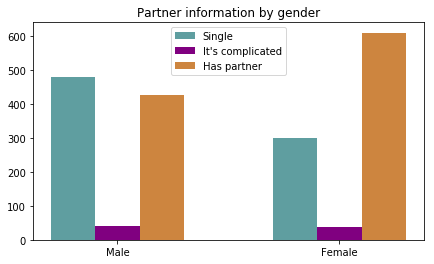

In [149]:
single_male = data[(data["Sex"] == 'Male') & (data["HasPartner"] == 0)]
single_female = data[(data["Sex"] == 'Female') & (data["HasPartner"] == 0)]
maybe_male = data[(data["Sex"] == 'Male') & (data["HasPartner"] == 0.5)]
maybe_female = data[(data["Sex"] == 'Female') & (data["HasPartner"] == 0.5)]
partner_male = data[(data["Sex"] == 'Male') & (data["HasPartner"] == 1)]
partner_female = data[(data["Sex"] == 'Female') & (data["HasPartner"] == 1)]

import numpy as np
import matplotlib.pyplot as plt


N = 2

fig, ax = plt.subplots(figsize=(7,4))

ind = np.arange(N)    # the x locations for the groups
width = 0.20         # the width of the bars
p1 = ax.bar(ind - width, [len(single_male), len(single_female)], width, color='cadetblue', bottom=0)


p2 = ax.bar(ind, [len(maybe_male), len(maybe_female)], width,
            color='purple', bottom=0)

p3 = ax.bar(ind + width, [len(partner_male), len(partner_female)], width,
            color='peru', bottom=0)

ax.set_title('Partner information by gender')
ax.set_xticks(ind )
ax.set_xticklabels(['Male', 'Female'])

plt.legend((p1[0], p2[0], p3[0]), ('Single', 'It\'s complicated', 'Has partner'), loc="upper center")

plt.show()
fig.savefig("docs/plots/gbar-gender-relation.png", bbox_inches = 'tight')

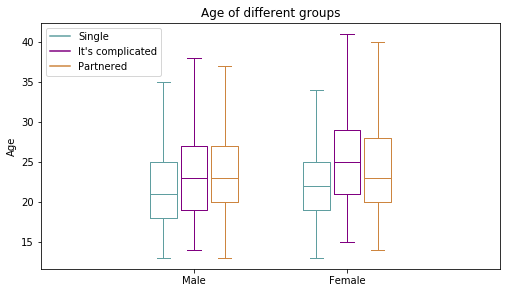

In [150]:
single = [single_male["Age"].values, single_female["Age"].values]
maybe = [maybe_male["Age"].values, maybe_female["Age"].values]
partner = [partner_male["Age"].values, partner_female["Age"].values]

ticks = ['Male', 'Female']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(7,4))

bpl = plt.boxplot(single, positions=np.array(range(len(single)))*2.0-0.4, sym='', widths=0.35)
bpm = plt.boxplot(maybe, positions=np.array(range(len(maybe)))*2.0, sym='', widths=0.35)
bpr = plt.boxplot(cuddling, positions=np.array(range(len(partner)))*2.0+0.4, sym='', widths=0.35)
set_box_color(bpl, 'cadetblue') # colors are from http://colorbrewer2.org/
set_box_color(bpm, 'purple')
set_box_color(bpr, 'peru')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='cadetblue', label='Single')
plt.plot([], c='purple', label='It\'s complicated')
plt.plot([], c='peru', label='Partnered')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.tight_layout()

plt.title("Age of different groups")
plt.ylabel("Age")

plt.show()
fig.savefig("docs/plots/boxplot-gender-relation-age.png", bbox_inches = 'tight')

# What about education?

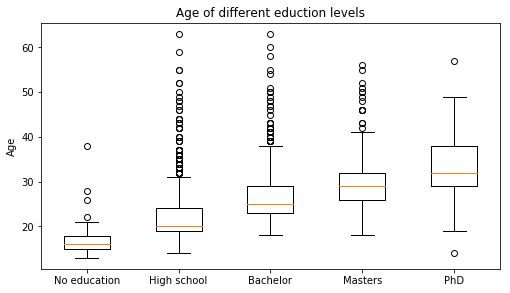

In [161]:
educations = [data[data["Education"] == 0]["Age"].values,
             data[data["Education"] == 1]["Age"].values,
             data[data["Education"] == 2]["Age"].values,
             data[data["Education"] == 3]["Age"].values,
             data[data["Education"] == 4]["Age"].values]

ticks = ['No education', 'High school', 'Bachelor', 'Masters', 'PhD']

plt.figure(figsize=(7,4))

bpl = plt.boxplot(educations)

plt.tight_layout()
plt.xticks(range(1, len(ticks) + 1), ticks)
plt.title("Age of different eduction levels")
plt.ylabel("Age")

plt.show()
fig.savefig("docs/plots/boxplot-education-age.png", bbox_inches = 'tight')

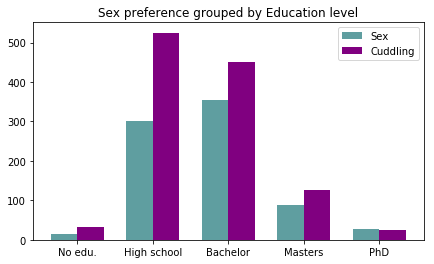

In [163]:
noe_cuddling = data[(data["SexPreference"] == 0) & (data["Education"] == 0)]
noe_sex = data[(data["SexPreference"] == 1) & (data["Education"] == 0)]
hs_cuddling = data[(data["SexPreference"] == 0) & (data["Education"] == 1)]
hs_sex = data[(data["SexPreference"] == 1) & (data["Education"] == 1)]
bs_cuddling = data[(data["SexPreference"] == 0) & (data["Education"] == 2)]
bs_sex = data[(data["SexPreference"] == 1) & (data["Education"] == 2)]
ms_cuddling = data[(data["SexPreference"] == 0) & (data["Education"] == 3)]
ms_sex = data[(data["SexPreference"] == 1) & (data["Education"] == 3)]
phd_cuddling = data[(data["SexPreference"] == 0) & (data["Education"] == 4)]
phd_sex = data[(data["SexPreference"] == 1) & (data["Education"] == 4)]

import numpy as np
import matplotlib.pyplot as plt


N = 5

fig, ax = plt.subplots(figsize=(7,4))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, [len(noe_sex), len(hs_sex), len(bs_sex), len(ms_sex), len(phd_sex)], width, color='cadetblue', bottom=0)


p2 = ax.bar(ind + width, [len(noe_cuddling), len(hs_cuddling), len(bs_cuddling), len(ms_cuddling), len(phd_cuddling)], width,
            color='purple', bottom=0)

ax.set_title('Sex preference grouped by Education level')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['No edu.', 'High school', 'Bachelor', 'Masters', 'PhD'])

plt.legend((p1[0], p2[0]), ('Sex', 'Cuddling'), loc="upper right")

plt.show()
fig.savefig("docs/plots/gbar-edu-sex.png", bbox_inches = 'tight')

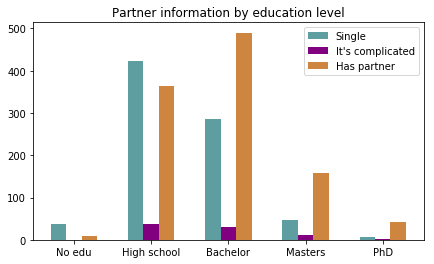

In [166]:
single_noed = data[(data["Education"] == 0) & (data["HasPartner"] == 0)]
single_hs = data[(data["Education"] == 1) & (data["HasPartner"] == 0)]
single_bs = data[(data["Education"] == 2) & (data["HasPartner"] == 0)]
single_ms = data[(data["Education"] == 3) & (data["HasPartner"] == 0)]
single_phd = data[(data["Education"] == 4) & (data["HasPartner"] == 0)]

maybe_noed = data[(data["Education"] == 0) & (data["HasPartner"] == 0.5)]
maybe_hs = data[(data["Education"] == 1) & (data["HasPartner"] == 0.5)]
maybe_bs = data[(data["Education"] == 2) & (data["HasPartner"] == 0.5)]
maybe_ms = data[(data["Education"] == 3) & (data["HasPartner"] == 0.5)]
maybe_phd = data[(data["Education"] == 4) & (data["HasPartner"] == 0.5)]

partner_noed = data[(data["Education"] == 0) & (data["HasPartner"] == 1)]
partner_hs = data[(data["Education"] == 1) & (data["HasPartner"] == 1)]
partner_bs = data[(data["Education"] == 2) & (data["HasPartner"] == 1)]
partner_ms = data[(data["Education"] == 3) & (data["HasPartner"] == 1)]
partner_phd = data[(data["Education"] == 4) & (data["HasPartner"] == 1)]

import numpy as np
import matplotlib.pyplot as plt


N = 5

fig, ax = plt.subplots(figsize=(7,4))

ind = np.arange(N)    # the x locations for the groups
width = 0.20         # the width of the bars
p1 = ax.bar(ind - width, [len(single_noed), len(single_hs), len(single_bs), len(single_ms), len(single_phd)], 
            width, color='cadetblue', bottom=0)


p2 = ax.bar(ind, [len(maybe_noed), len(maybe_hs), len(maybe_bs), len(maybe_ms), len(maybe_phd)], width,
            color='purple', bottom=0)

p3 = ax.bar(ind + width, [len(partner_noed), len(partner_hs), len(partner_bs), len(partner_ms), len(partner_phd)], width,
            color='peru', bottom=0)

ax.set_title('Partner information by education level')
ax.set_xticks(ind )
ax.set_xticklabels(['No edu', 'High school', 'Bachelor', 'Masters', 'PhD'])

plt.legend((p1[0], p2[0], p3[0]), ('Single', 'It\'s complicated', 'Has partner'), loc="upper right")

plt.show()
fig.savefig("docs/plots/gbar-edu-relation.png", bbox_inches = 'tight')

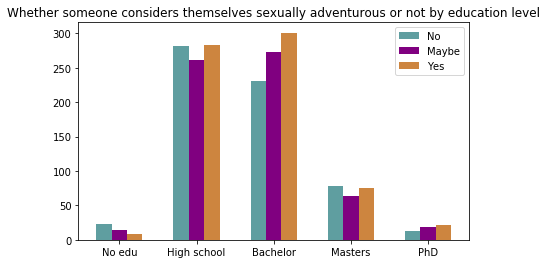

In [167]:
regular_noed = data[(data["Education"] == 0) & (data["IsAdv"] == 0)]
regular_hs = data[(data["Education"] == 1) & (data["IsAdv"] == 0)]
regular_bs = data[(data["Education"] == 2) & (data["IsAdv"] == 0)]
regular_ms = data[(data["Education"] == 3) & (data["IsAdv"] == 0)]
regular_phd = data[(data["Education"] == 4) & (data["IsAdv"] == 0)]

maybe_noed = data[(data["Education"] == 0) & (data["IsAdv"] == 0.5)]
maybe_hs = data[(data["Education"] == 1) & (data["IsAdv"] == 0.5)]
maybe_bs = data[(data["Education"] == 2) & (data["IsAdv"] == 0.5)]
maybe_ms = data[(data["Education"] == 3) & (data["IsAdv"] == 0.5)]
maybe_phd = data[(data["Education"] == 4) & (data["IsAdv"] == 0.5)]

adv_noed = data[(data["Education"] == 0) & (data["IsAdv"] == 1)]
adv_hs = data[(data["Education"] == 1) & (data["IsAdv"] == 1)]
adv_bs = data[(data["Education"] == 2) & (data["IsAdv"] == 1)]
adv_ms = data[(data["Education"] == 3) & (data["IsAdv"] == 1)]
adv_phd = data[(data["Education"] == 4) & (data["IsAdv"] == 1)]

import numpy as np
import matplotlib.pyplot as plt


N = 5

fig, ax = plt.subplots(figsize=(7,4))

ind = np.arange(N)    # the x locations for the groups
width = 0.20         # the width of the bars
p1 = ax.bar(ind - width, [len(regular_noed), len(regular_hs), len(regular_bs), len(regular_ms), len(regular_phd)], 
            width, color='cadetblue', bottom=0)


p2 = ax.bar(ind, [len(maybe_noed), len(maybe_hs), len(maybe_bs), len(maybe_ms), len(maybe_phd)], width,
            color='purple', bottom=0)

p3 = ax.bar(ind + width, [len(adv_noed), len(adv_hs), len(adv_bs), len(adv_ms), len(adv_phd)], width,
            color='peru', bottom=0)

ax.set_title('Whether someone considers themselves sexually adventurous or not by education level')
ax.set_xticks(ind )
ax.set_xticklabels(['No edu', 'High school', 'Bachelor', 'Masters', 'PhD'])

plt.legend((p1[0], p2[0], p3[0]), ('No', 'Maybe', 'Yes'), loc="upper right")

plt.show()
fig.savefig("docs/plots/gbar-edu-adv.png", bbox_inches = 'tight')